# Milestone 1
## Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

pd.options.mode.chained_assignment = None

font = {'family' : 'DejaVu Sans',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
# Load the data
DATA_PATH = '../data'
movies = pd.read_csv(f'{DATA_PATH}/movies.csv').drop(columns = 'Unnamed: 0')
persons = pd.read_csv(f'{DATA_PATH}/persons.csv').drop(columns = 'Unnamed: 0')
genres = pd.read_csv(f'{DATA_PATH}/genres.csv').drop(columns = 'Unnamed: 0')
countries = pd.read_csv(f'{DATA_PATH}/countries.csv').drop(columns = 'Unnamed: 0')

In [3]:
# Split attributes with multiple values per row
movies['genres'] = movies.genres.str.split(',')
movies['countries'] = movies.countries.str.split(',')
movies['actors'] = movies.actors.str.split(',')
movies['directors'] = movies.directors.str.split(',')
movies['alternate genres'] = movies['alternate genres'].str.split(',')
movies['release date on Netflix'] = pd.to_datetime(movies['release date on Netflix'])

In [4]:
# Dictionnary for faster countries and genres access 
countries_to_name = countries.set_index('id').to_dict(orient='index')
genres_to_name = genres.set_index('id').to_dict(orient='index')

def get_genre_name(id_):
    return genres_to_name[int(id_)]['name']

def get_country_name(id_):
    return countries_to_name[int(id_)]['name']

In [5]:
movies.head()

,id,title,description,imdb,metacritic,duration,number of seasons,audio,family friendly,age rating,release date on Netflix,year,actors,directors,countries,genres,alternate genres
0,0,Riding Faith (Hope Ranch),"Following her father's death, a young woman st...",4.2,NaN,81.0,NaN,English,False,10+,2020-06-17,2020,"[0, 1, 2, 3, 4]",[5],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1]","[2, 3, 4, 5]"
1,1,Los Rodriguez y el mas alla,When a young boy finds a message from his late...,4.6,NaN,116.0,NaN,European Spanish,False,10+,2020-03-22,2019,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",[18],"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...","[6, 1, 7]","[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]"
2,2,Mauricio Meirelles: Generating Chaos,Comedian Mauricio Meirelles explores his chaot...,5.2,NaN,63.0,NaN,Brazilian Portuguese,False,18+,2020-04-16,2020,[19],[20],"[32, 0, 15, 33, 1, 34, 35, 16, 36, 37, 38, 17,...","[6, 19]","[11, 20, 21, 22]"
3,3,The Asterisk War,A 'Genestella' a new breed of powerful human n...,6.8,NaN,NaN,1.0,Japanese,False,13+,2018-07-01,2015,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]",NaN,"[32, 0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42...","[23, 24]","[24, 25, 26, 27, 28]"
4,4,Banana Split,"Despite leaving for college, a heartsick teen ...",6.2,63.0,83.0,NaN,English,False,16+,2020-07-26,2018,"[33, 34, 35, 36, 37, 38, 39, 40]",[41],"[2, 13]",[6],"[11, 3, 29, 30]"


### Movies vs. TV shows 

A first interesting statistic to note is the proportion of movies and TV shows available on the streaming platform. Netflix is best-known for TV-shows, but it actually started out as a movie-rental service. There are clearly more movies than TV shows.

There are 7538 movies in the dataset and 1575 TV shows


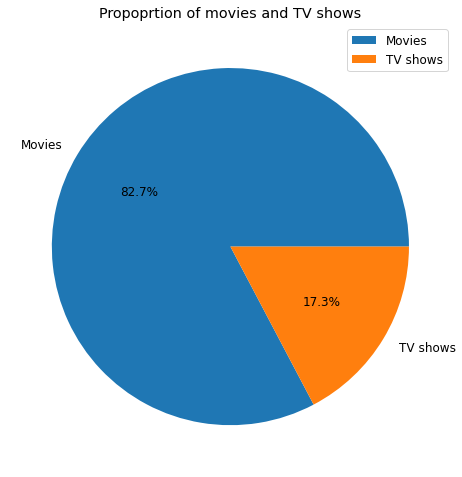

In [6]:
nb_movies = movies.duration.dropna().count()
nb_shows = movies['number of seasons'].dropna().count()
print('There are {0} movies in the dataset and {1} TV shows'.format(nb_movies, nb_shows))

plt.figure(figsize = (8, 10))
plt.pie([nb_movies, nb_shows], autopct='%1.1f%%', labels = ['Movies', 'TV shows'])
plt.legend()
plt.title('Propoprtion of movies and TV shows')
plt.show()

### Number of items per country

In 2010, Netflix decided to expand its operations to a wider range of countries. Today, it is available in more than 190 countries. Naturally, some content is specific to a certain subset of countries, depending on language, culture and copyrights. Let's explore the catalogue's size depending on the country.

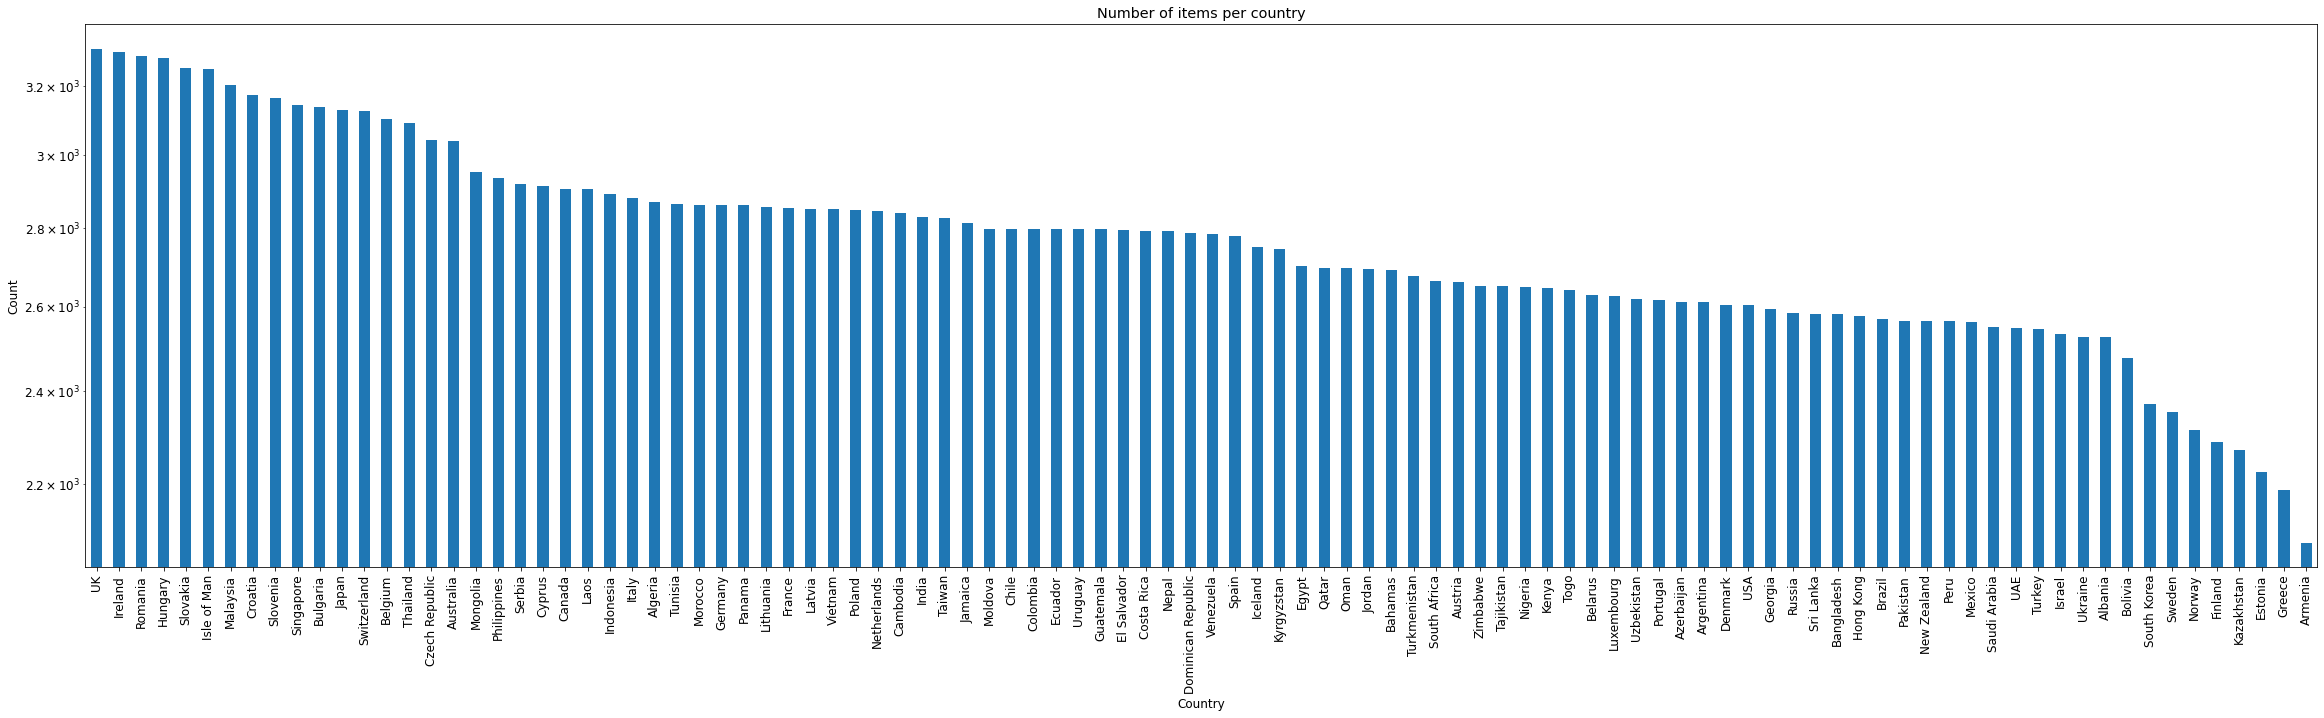

In [7]:
countries_count = movies.countries.explode().value_counts()
countries_count.index = countries_count.index.map(get_country_name)
countries_count.plot.bar(figsize = (40, 10))
plt.title('Number of items per country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

### Audio representation in the catalogue



There are 73 different languages in our dataset. The 3 most present ones are English, Japanese and Korean : 


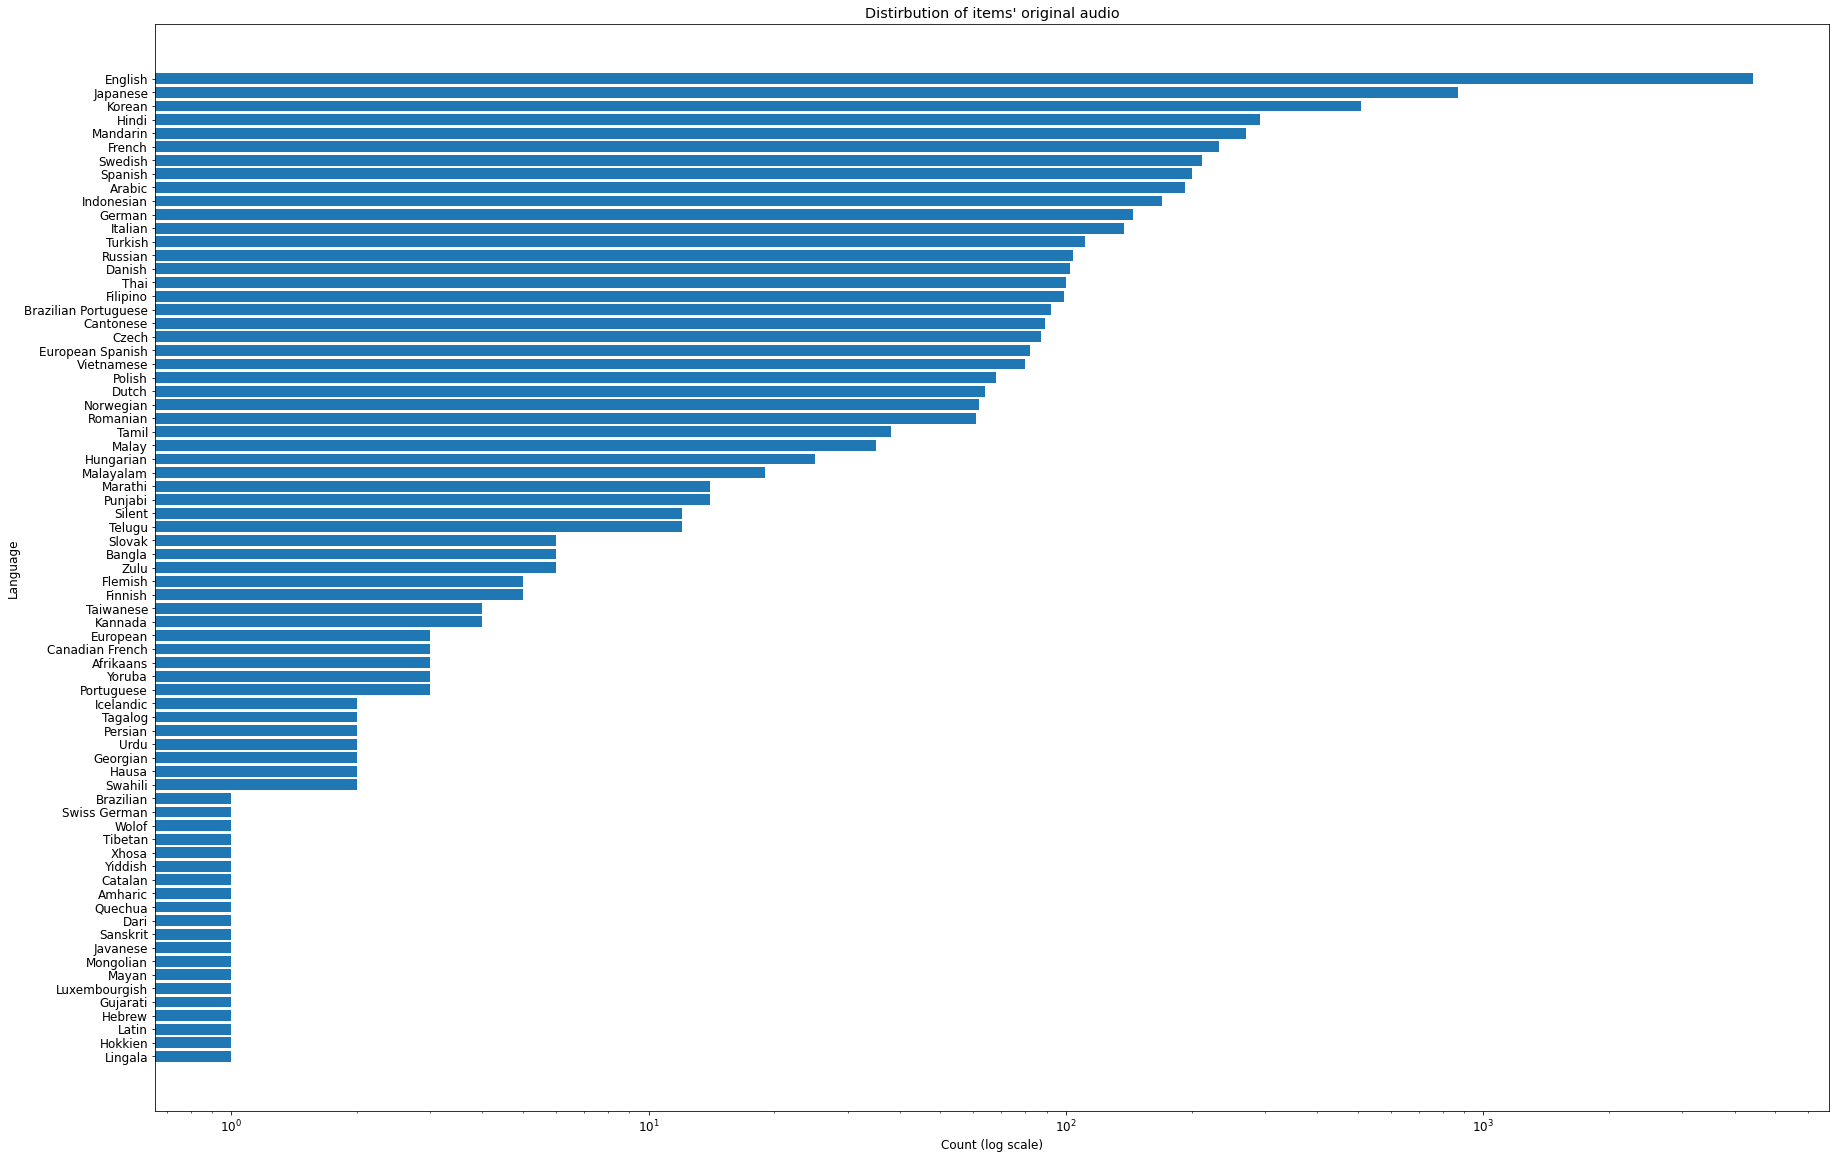

In [8]:
bar_values = movies[['audio', 'id']].groupby('audio').count().reset_index().sort_values('id', ascending = True)
plt.figure(figsize=(30,20))
plt.barh(bar_values.audio, bar_values.id)
plt.xscale('log')

plt.title('Distirbution of items\' original audio')
plt.ylabel('Language')
plt.xlabel('Count (log scale)')

print('There are {} different languages in our dataset. The 3 most present ones are English, Japanese and Korean : '.format(bar_values.id.count()))

### Releases per month, per rating

In [8]:
rating_release = movies.filter(items=['age rating', 'release date on Netflix'])
rating_release['release date on Netflix'] = rating_release['release date on Netflix'].dt.month
rating_release_grouped = rating_release.groupby([
    'age rating', 'release date on Netflix'], as_index=False).size()

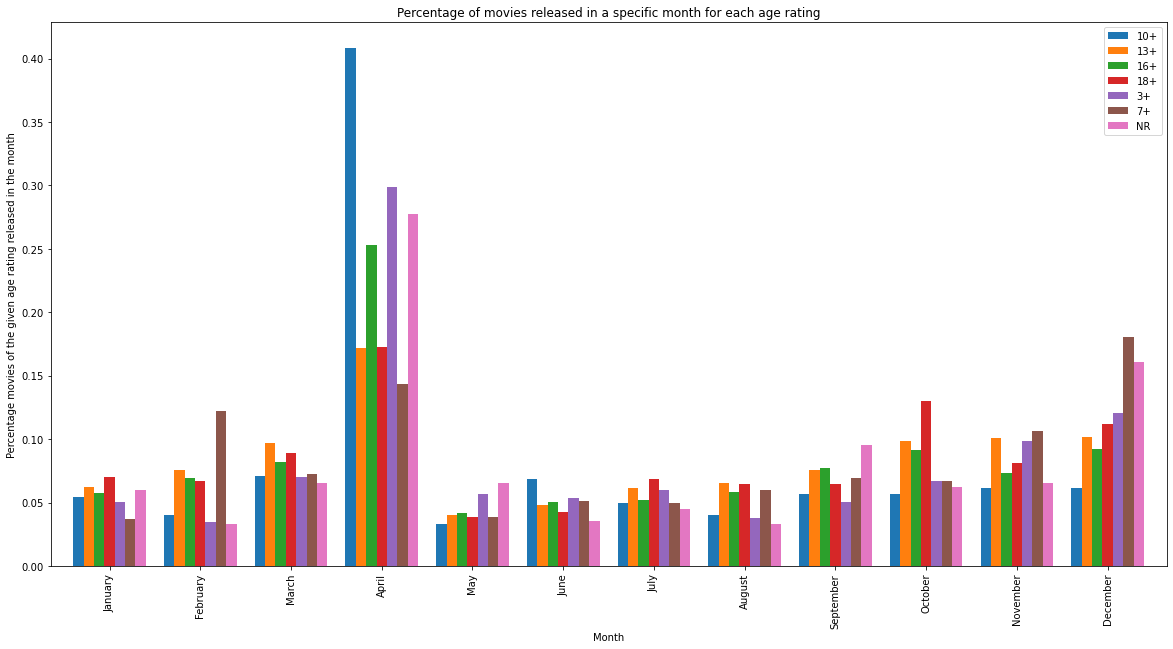

In [9]:
release_statistics = {}
OCCURENCE_THRESHOLD = 10
for age_rating in rating_release_grouped['age rating'].unique():
    stats_for_age_rating = rating_release_grouped[rating_release_grouped['age rating'] == age_rating]
#     print(stats_for_age_rating)
    stats_aggregator = []
    for month in range(1, 13):
        rating_month_stats = stats_for_age_rating[stats_for_age_rating['release date on Netflix'] == month]
        if len(rating_month_stats) == 0:
            stats_aggregator.append(0)
        else:
            stats_aggregator.append(next(iter(rating_month_stats['size'])))
    rating_occurences = sum(stats_aggregator)
    if OCCURENCE_THRESHOLD <= rating_occurences:
        stats_aggregator = [x / rating_occurences for x in stats_aggregator]
        release_statistics[age_rating] = stats_aggregator
        
months = list(map(lambda i: calendar.month_name[i], range(1, 13)))
pd.DataFrame(release_statistics, index=months).plot.bar(figsize=(20, 10), width = 0.8)
plt.title('Percentage of movies released in a specific month for each age rating')
plt.xlabel('Month')
plt.ylabel('Percentage movies of the given age rating released in the month')
plt.show()

### Releases per month

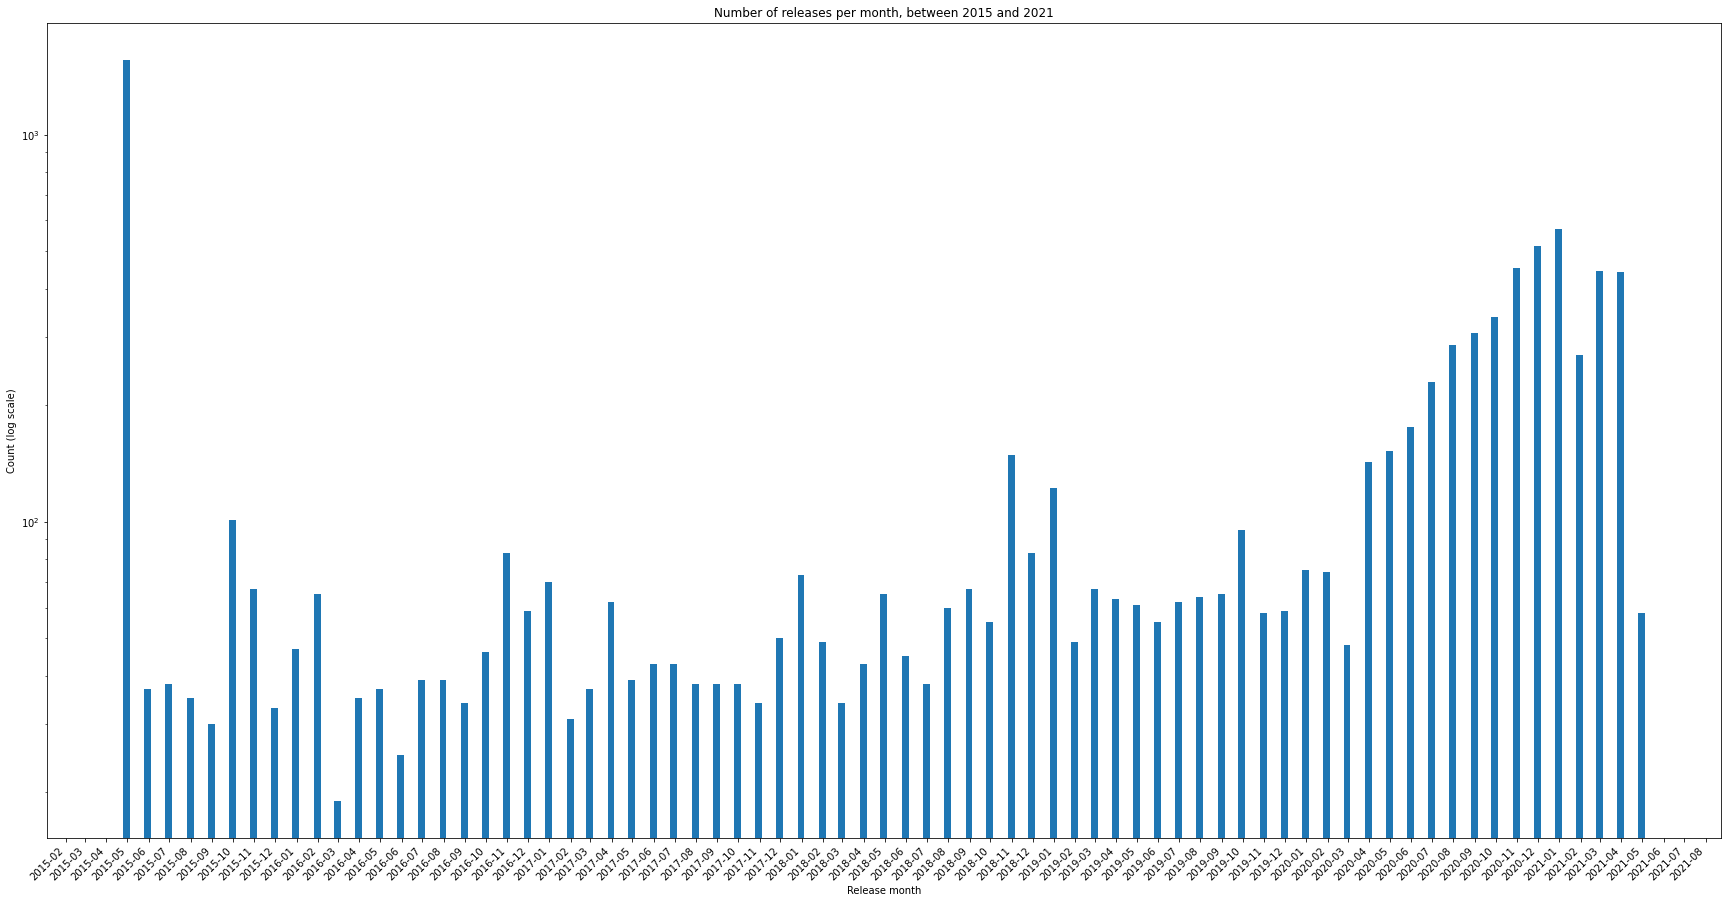

In [11]:
from matplotlib.dates import MonthLocator, DateFormatter

release_date = movies[['id', 'release date on Netflix']].copy()
release_date.set_index('release date on Netflix', inplace = True)
release_date = release_date.groupby([pd.Grouper(freq='M')]).count().reset_index()

fig, ax = plt.subplots(figsize=(30,15))

ax.bar(release_date['release date on Netflix'], release_date.id, width = 10)
ax.set_yscale('log')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.xticks(rotation = 45, ha = 'right')
plt.title('Number of releases per month, between 2015 and 2021')
plt.xlabel('Release month')
plt.ylabel('Count (log scale)')
plt.show()

### Number of items per genre

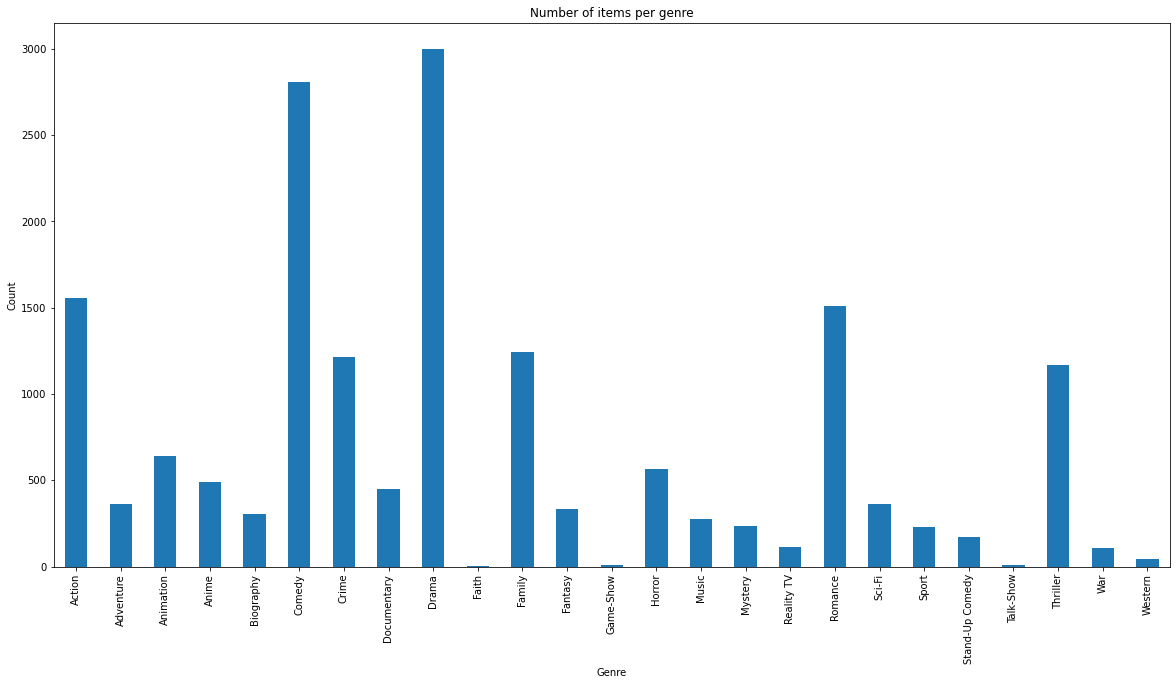

In [12]:
genre_counts = movies.genres.explode().value_counts()
genre_counts.index = genre_counts.index.map(get_genre_name)
genre_counts.sort_index(inplace = True)

genre_counts.plot.bar(figsize = (20, 10))
plt.title('Number of items per genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Number of items per genre per release date

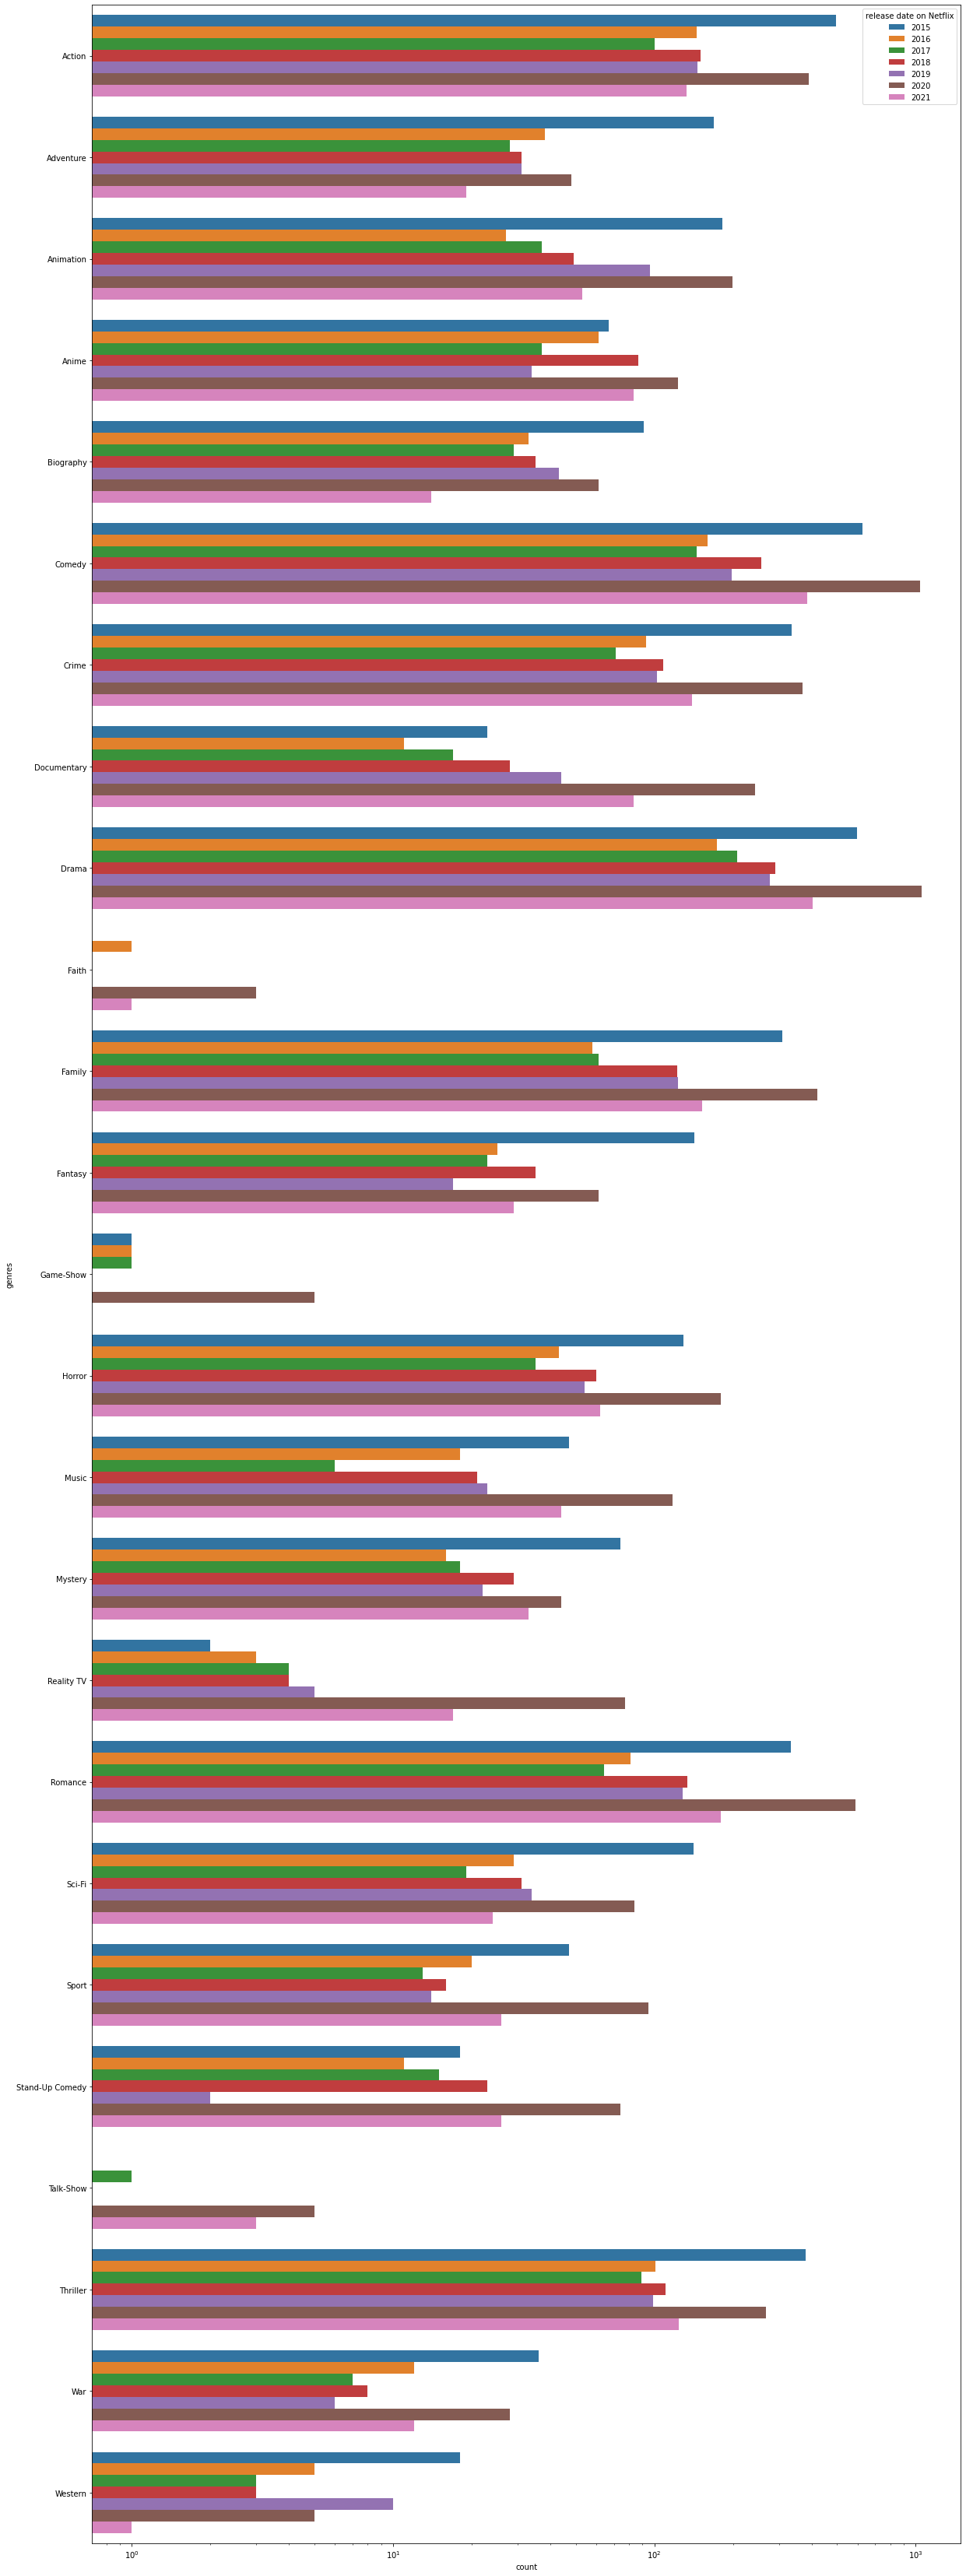

In [13]:
genres_release_year = movies.explode('genres')[['genres', 'release date on Netflix']]
genres_release_year.genres = genres_release_year.genres.map(get_genre_name)
genres_release_year['release date on Netflix'] = genres_release_year['release date on Netflix'].dt.year
genres_release_year['count'] = 1
genres_release_year = genres_release_year.groupby(['genres', 'release date on Netflix'])\
                                         .count()\
                                         .reset_index()


plt.figure(figsize = (20, 60))
f = sns.barplot(data = genres_release_year, y = 'genres', x = 'count', 
            hue = 'release date on Netflix', orient = 'h') 
plt.xscale('log')

In [14]:
movies_release_genre = movies.filter(items=[
        'title', 
        'genres', 
        'release date on Netflix']
    ).dropna()
movies_release_genre['release date on Netflix'] = movies_release_genre['release date on Netflix']\
    .apply(lambda dt: dt.replace(day=1))
movies_release_genre.set_index('release date on Netflix')

num_movies = len(movies_release_genre)

start_date = movies_release_genre['release date on Netflix'].min() - pd.DateOffset(years=1)
end_date = movies_release_genre['release date on Netflix'].max()

x_points = []


def get_genre_statistics_pre_date(date):
#     if date not in critdates:
#         return {}
    movies_pre_date = movies_release_genre[
        movies_release_genre['release date on Netflix'] == date
    ]
    serieses = []
    for _, row in movies_pre_date.iterrows():
        genres_splitted = row['genres']
        current_series = pd.Series(1/len(genres_splitted), genres_splitted)
        serieses.append(current_series)
    if serieses == []:
        return {}
    movies_pre_date = pd.concat(serieses).reset_index()
    movies_pre_date.columns = ['genre', 'weight']
    sum_per_genre = (movies_pre_date.groupby(by='genre').sum() / num_movies)\
        .reset_index()\
        .astype({'genre': 'int32'})
#     print(sum_per_genre)
    joined_sum_per_genre = sum_per_genre.join(genres)
    return {
        row['name']: row['weight']\
        for _, row in joined_sum_per_genre.iterrows()
    }


genre_stats_per_date = []
current_date = start_date
while current_date <= end_date:
    current_date_stats = get_genre_statistics_pre_date(current_date)
    if genre_stats_per_date == []:
        genre_stats_per_date.append(current_date_stats)
    else:
        last_stats = genre_stats_per_date[-1]
        genre_stats_per_date.append({
            key: last_stats.get(key, 0) + current_date_stats.get(key, 0)
            for key in set(list(last_stats.keys()) + list(current_date_stats.keys()))
        })
    x_points.append(current_date)#.to_period('M'))
    current_date += pd.DateOffset(months=1)

In [15]:
all_genres = genre_stats_per_date[-1].keys()
for date_stats in genre_stats_per_date:
    for genre in all_genres:
        if genre not in date_stats:
            date_stats[genre] = 0
# genre_stats_per_date

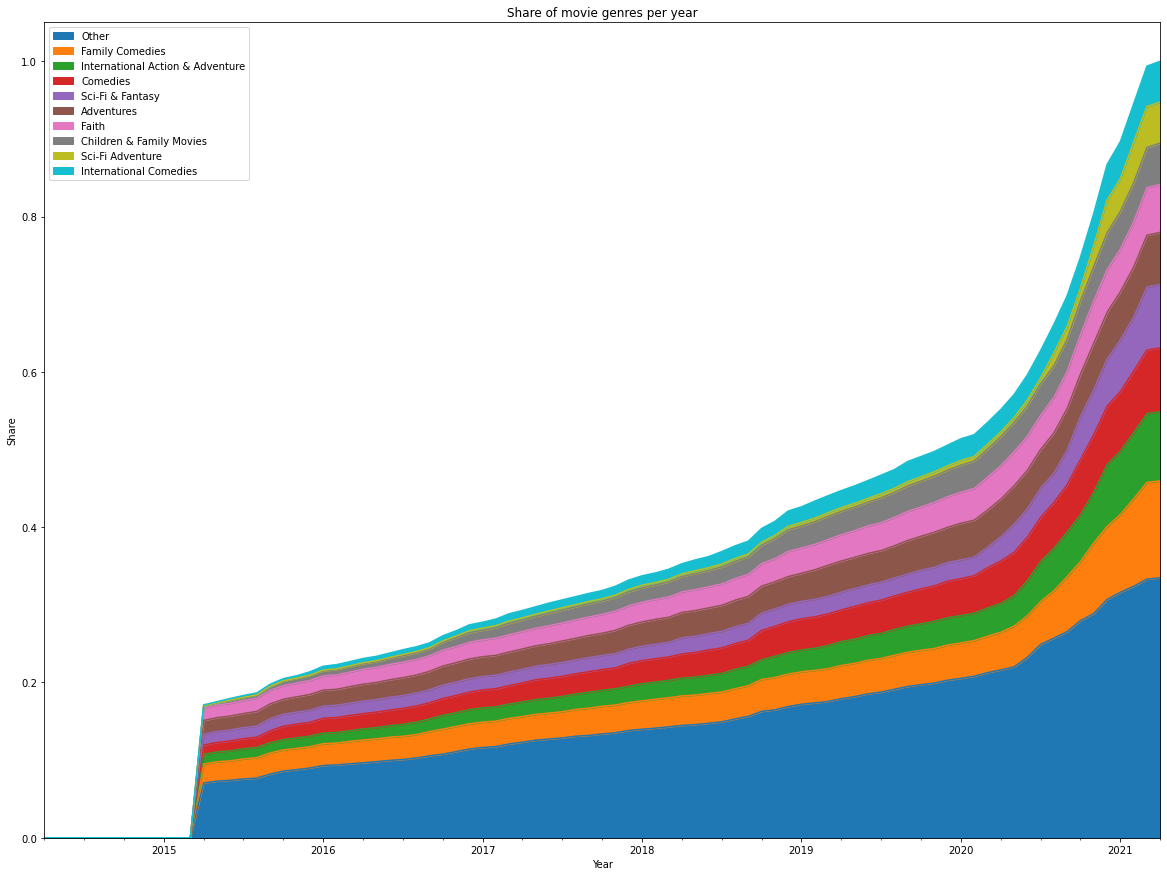

In [16]:
stats_per_genre = {
    genre: np.array([
        date_stats[genre]\
        for date_stats in genre_stats_per_date
    ])\
    for genre in all_genres
}

OTHERS_THRESHOLD = 5e-2
other = sum([
    stats\
    for stats in stats_per_genre.values()\
    if stats[-1] < OTHERS_THRESHOLD
])

stats_per_genre = {
    key: stats_per_genre[key]\
    for key in stats_per_genre\
    if stats_per_genre[key][-1] >= OTHERS_THRESHOLD
}

stats_per_genre['Other'] = other

stats_per_genre = {
    genre: stats_per_genre[genre]\
    for genre in sorted(stats_per_genre, key=lambda x: -stats_per_genre[x][-1])
}


pd.DataFrame(stats_per_genre, index=x_points).plot.area(figsize=(20, 15))
plt.title('Share of movie genres per year')
plt.xlabel('Year')
plt.ylabel('Share')
plt.show()


### Top actors bar plot

There are 5451 different directors in our dataset. The top 10 directors per occurence on Netflix are : 


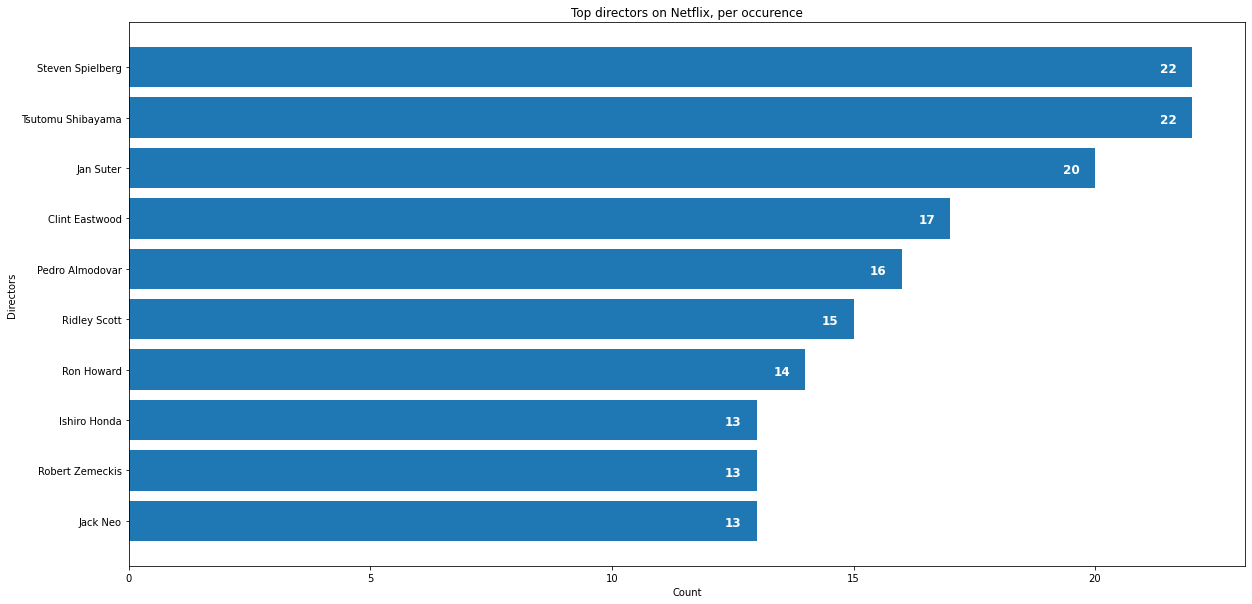

There are 40867 different actors in our dataset. The top 10 actors per occurence on Netflix are : 


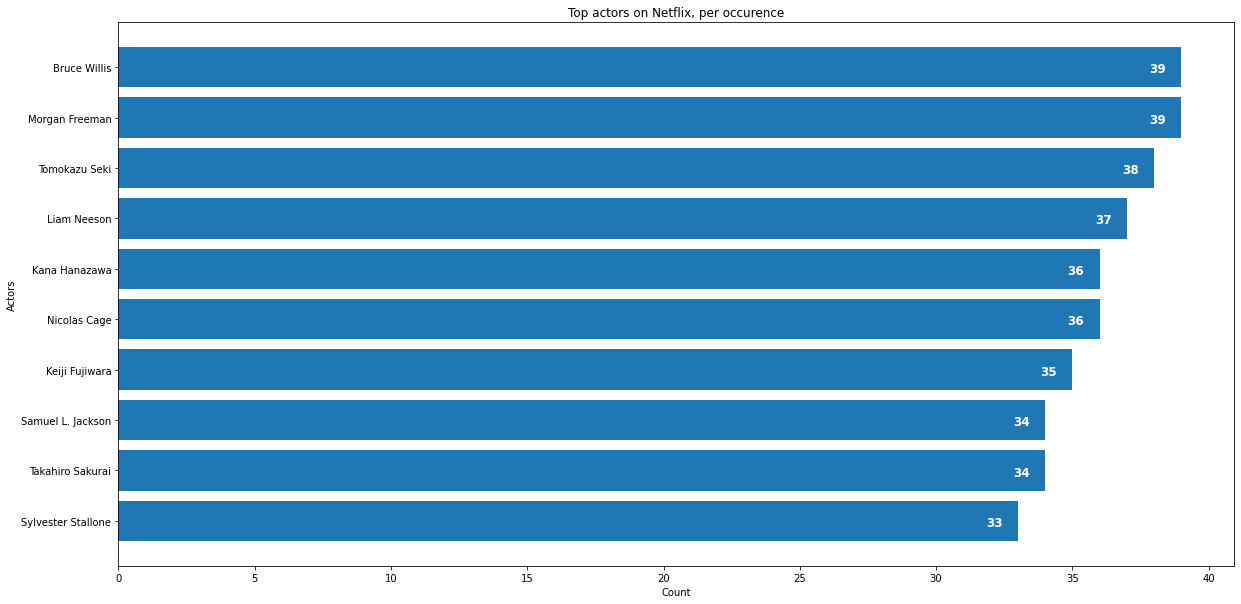

In [18]:
for role in ['directors', 'actors']:
    directors = movies[[role, 'id']].dropna()
    directors[role] = directors[role].apply(lambda x : [int(i) for i in x])
    directors = directors.explode(role)
    directors = directors.merge(persons[['id', 'name']], right_on = 'id', left_on=role)[[role, 'name']]
    dir_values = directors.groupby('name').count().reset_index()
    nb_directors = dir_values.name.count()
    dir_values = dir_values.sort_values(role, ascending = True)[-10:]
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.barh(dir_values.name, dir_values[role])

    for i, v in enumerate(dir_values[role]):
        ax.text((v/dir_values.max()[1] - 0.03)*dir_values.max()[1] , i-0.10, str(v), 
                color = 'white', fontweight = 'bold', fontsize = 'large')
    print('There are {} different {} in our dataset. The top 10 {} per occurence on Netflix are : '.format(nb_directors, role, role))
    plt.title('Top {} on Netflix, per occurence'.format(role))
    plt.ylabel(role.title())
    plt.xlabel('Count')
    plt.show()

There is 6712 different actors in our dataset. The actors appearing in more than 6 movies / TV shows on Netflix are : 


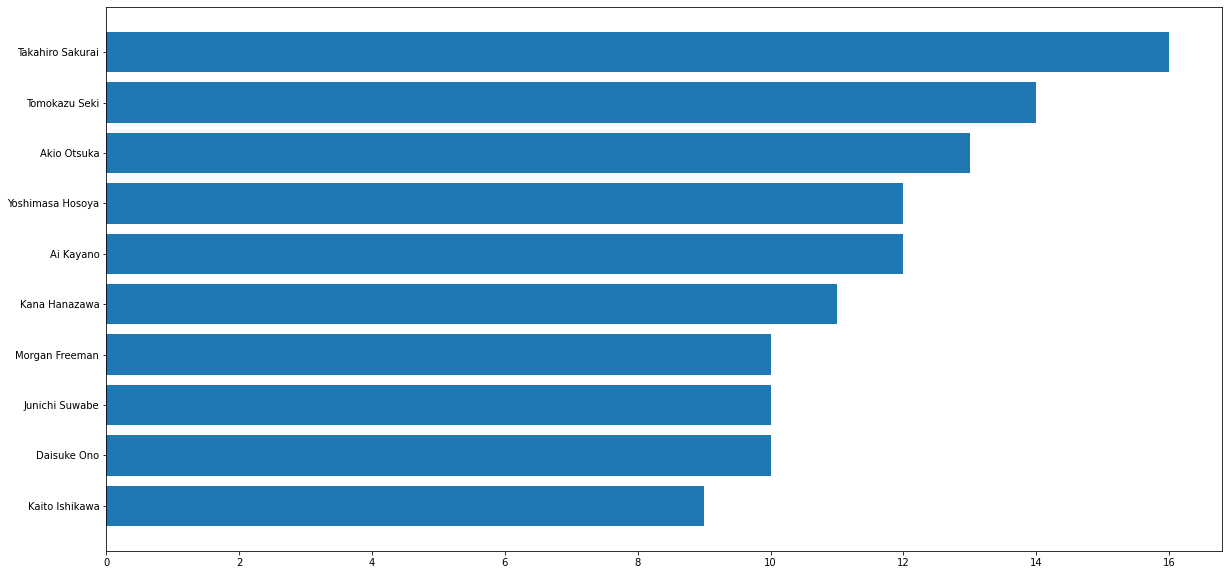

In [19]:
top_rated_items = movies.sort_values('imdb', ascending = False)[:1000][['id', 'actors']].dropna()
top_rated_items.actors = top_rated_items.actors.apply(lambda x : [int(i) for i in x])
top_rated_items = top_rated_items.explode("actors")

top_rated_items = top_rated_items.merge(persons[['id', 'name']], right_on = 'id', left_on='actors')[['actors', 'name']]
top_actors = top_rated_items.groupby('name').count().reset_index()
nb_actors = top_actors.name.count()
top_actors = top_actors.sort_values('actors', ascending = True)[-10:]


fig, ax = plt.subplots(figsize=(20,10))
ax.barh(top_actors.name, top_actors.actors)

print('There is {} different actors in our dataset. The actors appearing in more than 6 movies / TV shows on Netflix are : '.format(nb_actors))

There is 24 different actors in our dataset. The actors appearing in more than 6 movies / TV shows on Netflix are : 


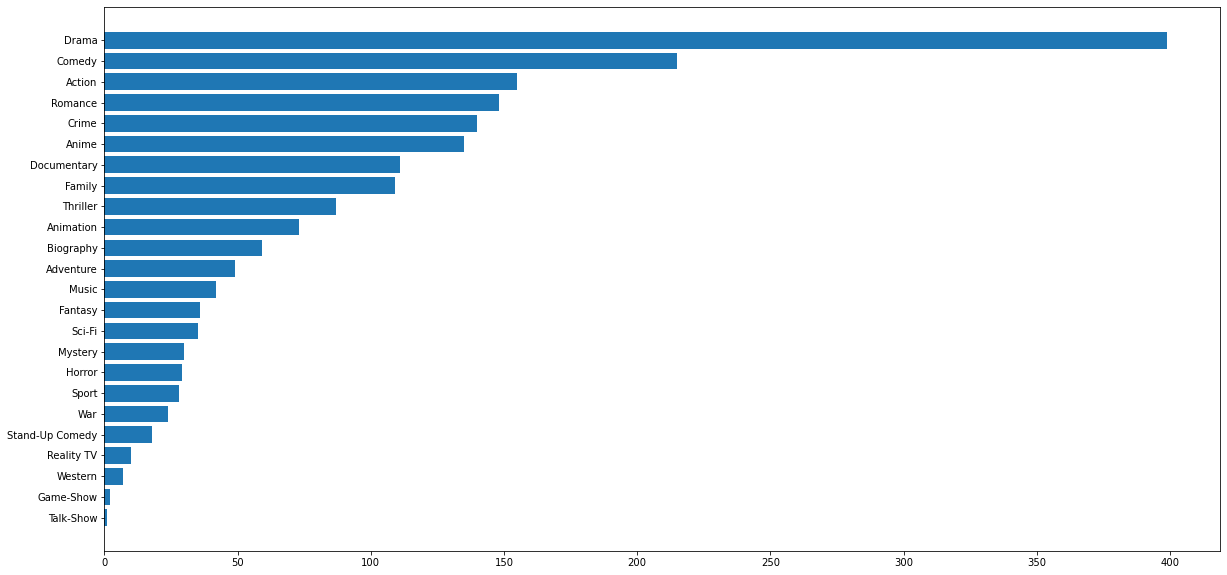

In [20]:
top_rated_items = movies.sort_values('imdb', ascending = False)[:1000][['id', 'genres']].dropna()
top_rated_items.genres = top_rated_items.genres.apply(lambda x : [int(i) for i in x])
top_rated_items = top_rated_items.explode("genres")

top_rated_items = top_rated_items.merge(genres[['id', 'name']], right_on = 'id', left_on='genres')[['genres', 'name']]
top_actors = top_rated_items.groupby('name').count().reset_index()
nb_actors = top_actors.name.count()
top_actors = top_actors.sort_values('genres', ascending = True)


fig, ax = plt.subplots(figsize=(20,10))
ax.barh(top_actors.name, top_actors.genres)

print('There is {} different actors in our dataset. The actors appearing in more than 6 movies / TV shows on Netflix are : '.format(nb_actors))